In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

In [3]:
import data_preprocessing

energy_consumption_data_train, energy_consumption_data_test = data_preprocessing.preprocess_data("Energy Consumption Dataset.csv")

energy_consumption_data_train.head()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
2015-02-20 10:00:00,0.469072,0.033333,0.408425,0.0,0.260638,0.000000,0.283465,0.0,0.141975,1.0,0.458498,0.0,0.291925,1.0,0.357285,0.0,1,2,42923.00
2015-02-20 11:00:00,0.371134,0.733333,0.434066,0.0,0.239362,0.683333,0.364173,0.0,0.129630,1.0,0.494071,0.0,0.260870,1.0,0.423154,0.0,1,2,40497.00
2015-02-20 12:00:00,0.350515,0.016667,0.454212,0.0,0.308511,1.000000,0.405512,0.0,0.203704,1.0,0.509881,0.0,0.260870,1.0,0.489022,0.0,1,2,40872.00
2015-02-20 13:00:00,0.412371,0.050000,0.459707,0.0,0.345745,1.000000,0.427165,0.0,0.148148,1.0,0.521739,0.0,0.254658,1.0,0.504990,0.0,1,2,42470.75
2015-02-20 14:00:00,0.319588,0.016667,0.459707,0.0,0.265957,0.766667,0.437008,0.0,0.080247,1.0,0.537549,0.0,0.416149,1.0,0.508982,0.0,1,2,46082.25


In [4]:
gridParams = {
    'max_depth': range(1, 32),
    # 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))




Best Parameters:  {'max_depth': 6}
Best Estimator:  DecisionTreeRegressor(max_depth=6, random_state=42)
Best Score (MSE):  -114121682.50615077
RMSE:  11564.649679926288
NRMSE:  17.075642559617116 %)
R2 Score:  0.19877900694784545


In [22]:
gridParams = {
    # 'max_depth': range(1, 32),
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05],
    # 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))


Best Parameters:  {'min_samples_leaf': 0.01}
Best Estimator:  DecisionTreeRegressor(min_samples_leaf=0.01, random_state=42)
Best Score (MSE):  -111917179.88479209
RMSE:  11509.387233087547
NRMSE:  0.16994045467158178
R2 Score:  0.20641808680423634


In [13]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Babett\anaconda3\Lib\site-pack

Best Parameters:  {'min_samples_split': 0.05}
Best Estimator:  DecisionTreeRegressor(min_samples_split=0.05, random_state=42)
Best Score (MSE):  -113878868.57967755
RMSE:  11530.522408958872
NRMSE:  0.1702525235354055
R2 Score:  0.20350083448070566


In [15]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    'max_features': range(2,8),
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'max_features': 4}
Best Estimator:  DecisionTreeRegressor(max_features=4, random_state=42)
Best Score (MSE):  -207132756.66302478
RMSE:  14654.544521105858
NRMSE:  0.21637989134314528
R2 Score:  -0.2865658103406319


In [19]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ccp_alpha': [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, .14, .16, .18, .2],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'ccp_alpha': 0.1}
Best Estimator:  DecisionTreeRegressor(ccp_alpha=0.1, random_state=42)
Best Score (MSE):  -209361293.40053678
RMSE:  14812.907130964246
NRMSE:  0.21871817516115297
R2 Score:  -0.31452229667468923


In [26]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_leaf_nodes': range(30,70),
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

# Get the feature names as a list
feature_names = list(X_TRAIN.columns)

# Plot the Decision Tree
plt.figure(figsize=(120,20))
plot_tree(bestRegressor.named_steps['regressor'], filled=True, feature_names=feature_names, fontsize=12)
plt.title("Decision Tree Regression")
plt.show()

Best Parameters:  {'max_leaf_nodes': 44}
Best Estimator:  DecisionTreeRegressor(max_leaf_nodes=44, random_state=42)
Best Score (MSE):  -113481104.5115759
RMSE:  11484.048731656561
NRMSE:  0.16956632211641853
R2 Score:  0.20990846234720884


In [30]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_impurity_decrease': [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, .62, .63, .64, .65, .66, .67, .68, .69, .7],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'min_impurity_decrease': 0.66}
Best Estimator:  DecisionTreeRegressor(min_impurity_decrease=0.66, random_state=42)
Best Score (MSE):  -208700226.0287016
RMSE:  14898.88311698651
NRMSE:  0.21998764310584576
R2 Score:  -0.32982588740127694


In [34]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_weight_fraction_leaf': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, .006, .007, .008, .009, .01, .011, .012, .013, .014, .015, .016, .017, .018, .019, .02] 
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'min_weight_fraction_leaf': 0.01}
Best Estimator:  DecisionTreeRegressor(min_weight_fraction_leaf=0.01, random_state=42)
Best Score (MSE):  -111917179.88479209
RMSE:  11509.387233087547
NRMSE:  0.16994045467158178
R2 Score:  0.20641808680423634


Best Parameters:  {'ccp_alpha': 0.05, 'max_depth': 6, 'max_features': 9, 'max_leaf_nodes': 45, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'min_weight_fraction_leaf': 0.0}
Best Estimator:  DecisionTreeRegressor(ccp_alpha=0.05, max_depth=6, max_features=9,
                      max_leaf_nodes=45, min_samples_leaf=0.01,
                      min_samples_split=0.01, random_state=42)
Best Score (MSE):  -113802242.90434346
RMSE:  11397.127334011479
NRMSE:  0.1682828948116156
R2 Score:  0.22182341718798027
MAE:  9018.599104167895
MAPE:  38.0840290198319


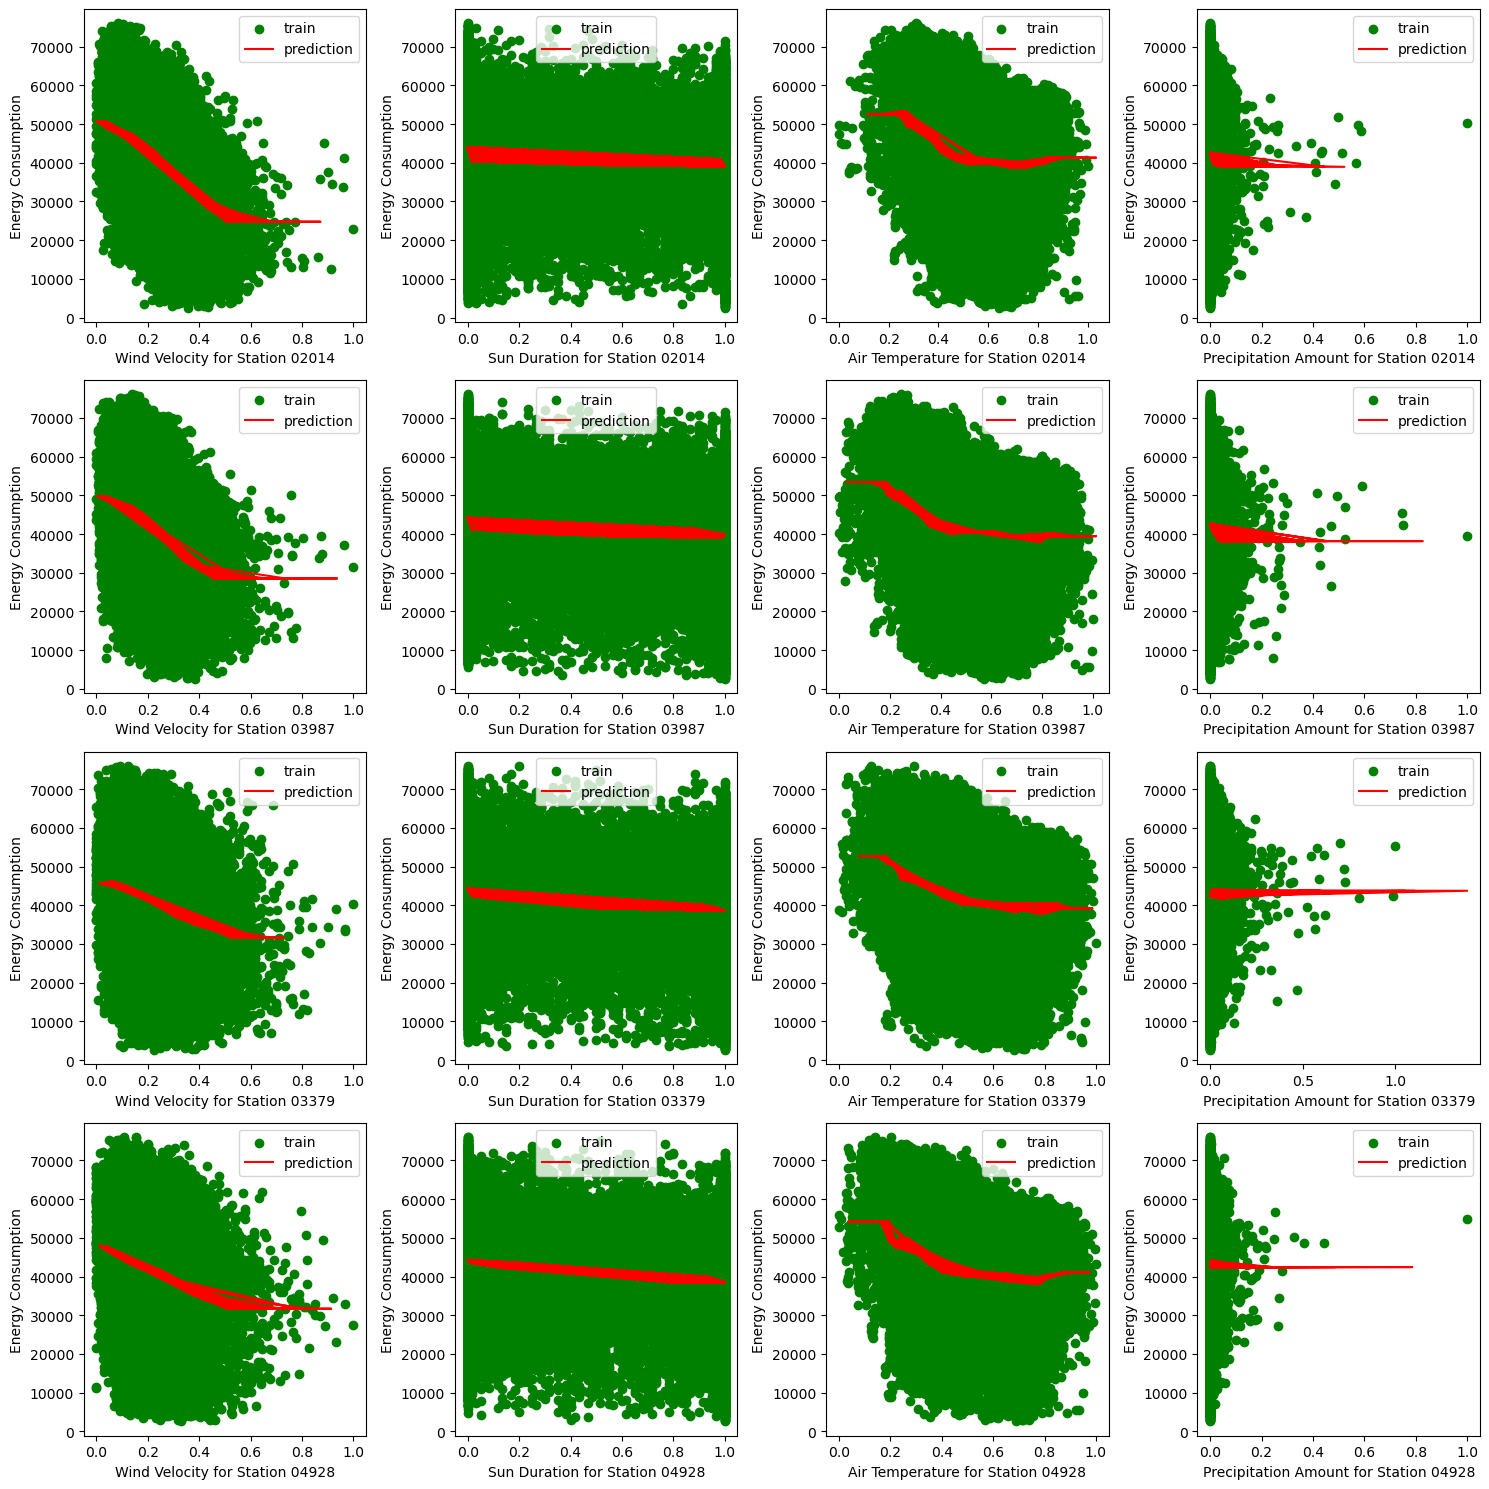

" # Range of ccp_alpha values to try\nccp_alphas = np.linspace(0.01, 0.1, 10)\n\n# List to store the average cross-validation score for each value of ccp_alpha\ncv_scores = []\n\nfrom sklearn.model_selection import cross_val_score\n\nfor ccp_alpha in ccp_alphas:\n    regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)\n    scores = cross_val_score(regressor, X_TRAIN, Y_TRAIN, cv=5)\n    cv_scores.append(scores.mean())\n\n# Plot ccp_alpha vs average cross-validation score\nplt.plot(ccp_alphas, cv_scores)\nplt.xlabel('ccp_alpha')\nplt.ylabel('Average cross-validation score')\nplt.show() "

In [18]:
gridParams = {
    'min_samples_leaf': np.linspace(0.01, 0.1, 10),
    'min_samples_split': np.linspace(0.01, 0.1, 10),
    'max_depth': range(5,7),
    #'min_samples_leaf': [0.0, 0.01, 0.02],
    #'min_samples_split': [0.03, 0.04, 0.05],
    'max_features': [9,10,11],
    #'ccp_alpha': [0.66],
    'ccp_alpha': [0.05, 0.1, 0.15],
    'max_leaf_nodes': range(44, 46),
    'min_impurity_decrease': [0.0, 0.25, 0.5],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.02] 
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-3]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

""" gridSearch = RandomizedSearchCV(estimator=regressor, param_distributions=gridParams, n_iter=100, cv=10, verbose=2, random_state=42, n_jobs=-1)
gridSearch.fit(X_TRAIN, Y_TRAIN) """

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-3]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)
#print("Residuals: ", Y_TEST - Y_PRED)

""" for column in X_TEST.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(X_TEST[column], Y_TEST - Y_PRED)
    plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
    plt.xlabel(column)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {column}')
    plt.show()
 """
# create a figure and specify its size
fig, axs = plt.subplots(4, 4, figsize=(15, 15))  # Adjusted to 4x4 grid

for i, column in enumerate(X_TEST.columns):
    ax = axs[i // 4, i % 4]  # Adjusted to 4x4 grid

    # Fit the model on one feature
    X_TRAIN_COLUMN = X_TRAIN[[column]]
    bestRegressor.fit(X_TRAIN_COLUMN, Y_TRAIN)

    # plot the original values
    ax.scatter(X_TRAIN_COLUMN, Y_TRAIN, c='green', label='train')

    X_TEST_COLUMN = X_TEST[[column]]
    Y_PRED = bestRegressor.predict(X_TEST_COLUMN)
    
    # plot the predicted values
    ax.plot(X_TEST_COLUMN, Y_PRED, c='red', label='prediction')

    ax.set_xlabel(column)
    ax.set_ylabel('Energy Consumption')
    ax.legend()

# show the plot
plt.tight_layout()  # Adjusts subplot params so that subplots fit in to the figure area.
plt.show()

""" # Calculate residuals
residuals = Y_TEST - Y_PRED

# Create a scatter plot
plt.scatter(Y_PRED, residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show() """


""" # Range of ccp_alpha values to try
ccp_alphas = np.linspace(0.01, 0.1, 10)

# List to store the average cross-validation score for each value of ccp_alpha
cv_scores = []

from sklearn.model_selection import cross_val_score

for ccp_alpha in ccp_alphas:
    regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(regressor, X_TRAIN, Y_TRAIN, cv=5)
    cv_scores.append(scores.mean())

# Plot ccp_alpha vs average cross-validation score
plt.plot(ccp_alphas, cv_scores)
plt.xlabel('ccp_alpha')
plt.ylabel('Average cross-validation score')
plt.show() """

In [4]:
gridParams = {
    'min_samples_leaf': [0.01],
    'min_samples_split': [0.01],
    'max_depth': [6],
    'max_features': [9],
    'ccp_alpha': [0.05],
    'max_leaf_nodes': [45],
    'min_impurity_decrease': [0.0],
    'min_weight_fraction_leaf': [0.0] 
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-3]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-3]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)

Best Parameters:  {'ccp_alpha': 0.05, 'max_depth': 6, 'max_features': 9, 'max_leaf_nodes': 45, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'min_weight_fraction_leaf': 0.0}
Best Estimator:  DecisionTreeRegressor(ccp_alpha=0.05, max_depth=6, max_features=9,
                      max_leaf_nodes=45, min_samples_leaf=0.01,
                      min_samples_split=0.01, random_state=42)
Best Score (MSE):  -113802242.90434346
RMSE:  11397.127334011479
NRMSE:  0.1682828948116156
R2 Score:  0.22182341718798027
MAE:  9018.599104167895
MAPE:  38.0840290198319


                                          Actual  Predicted  \
Actual                                  1.000000   0.615800   
Predicted                               0.615800   1.000000   
Wind Velocity for Station 02014        -0.522205  -0.765726   
Sun Duration for Station 02014         -0.223374  -0.193600   
Air Temperature for Station 02014      -0.265941  -0.334507   
Precipitation Amount for Station 02014 -0.032647  -0.027779   
Wind Velocity for Station 03987        -0.399506  -0.609082   
Sun Duration for Station 03987         -0.205037  -0.175302   
Air Temperature for Station 03987      -0.259469  -0.313228   
Precipitation Amount for Station 03987  0.004197  -0.027166   
Wind Velocity for Station 03379        -0.280101  -0.355837   
Sun Duration for Station 03379         -0.250507  -0.270596   
Air Temperature for Station 03379      -0.277006  -0.326879   
Precipitation Amount for Station 03379  0.004131   0.004187   
Wind Velocity for Station 04928        -0.278487  -0.35

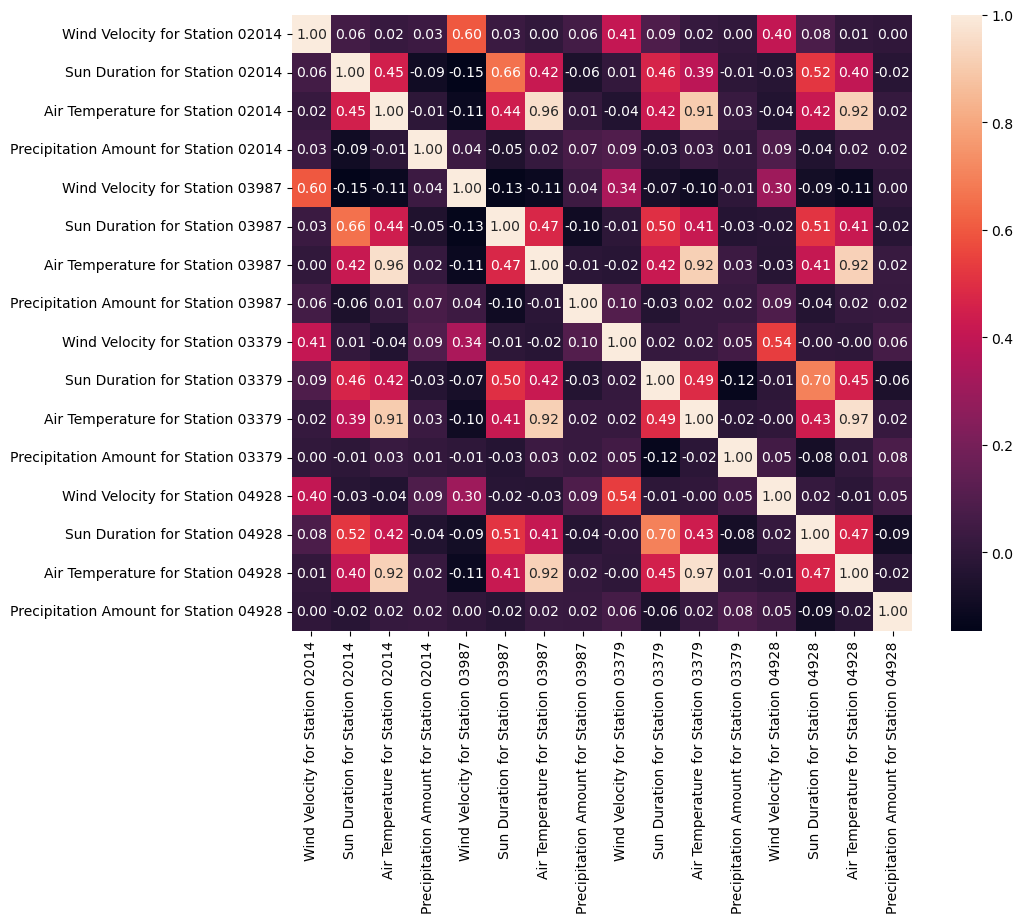

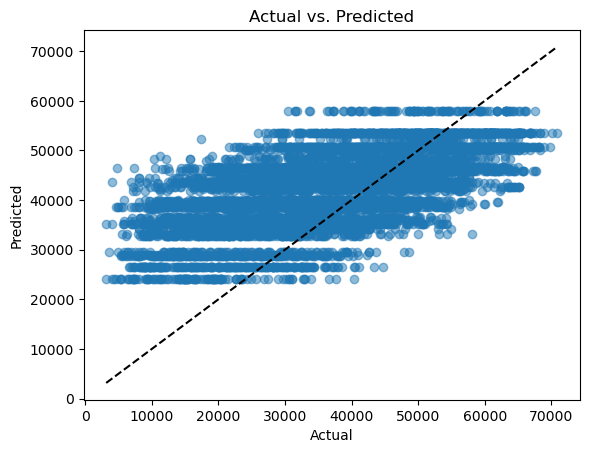

In [5]:
# Create a DataFrame with the actual and predicted values
df = pd.DataFrame({
    'Actual': Y_TEST,
    'Predicted': Y_PRED
})

# Add the input features to the DataFrame
for column in X_TEST.columns:
    df[column] = X_TEST[column]

# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

# Compute the correlation matrix
corr_matrix2 = X_TRAIN.corr()

import seaborn as sns

# Create a heatmap from the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, fmt=".2f")

# Show the plot
plt.show()

# Create a scatter plot of the actual vs. predicted values
plt.scatter(df['Actual'], df['Predicted'], alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Plot a diagonal (this line represents perfect prediction)
plt.plot([df['Actual'].min(), df['Actual'].max()], [df['Actual'].min(), df['Actual'].max()], 'k--')
plt.show()

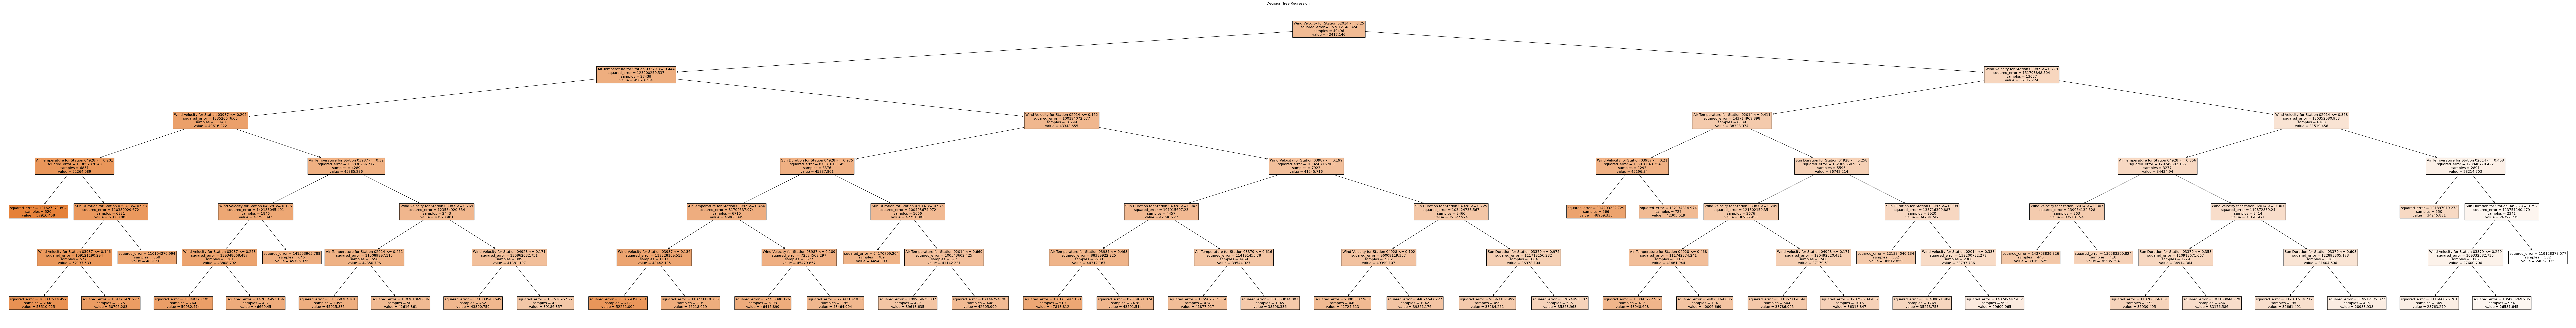

In [9]:
# Get the feature names as a list
feature_names = list(X_TRAIN.columns)

# Plot the Decision Tree
plt.figure(figsize=(160,20))
plot_tree(bestRegressor, filled=True, feature_names=feature_names, fontsize=12)
plt.title("Decision Tree Regression")
plt.show()